# Периодические граничные условия и расчёт энергии

Периодические граничные условия описываются следующим образом:

Пусть бесконечная периодическая структура задана векторами трансляции $\vec{a}$, $\vec{b}$, $\vec{c}$ и точкой $r$.

Тогда произвольную точку $r'$ данной структуру можно описать выражением:

$ r' = r + n_1\vec{a} + n_2\vec{b} + n_3\vec{c}, $

где $n_1$, $n_2$, $n_3$ - произвольные целые числа.

Для того, чтобы рассмотреть примеры нам понадобятся 4 библиотеки:

In [5]:
import pandas as pd
import numpy as np
from itertools import product, combinations, permutations, combinations_with_replacement
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Одномерный случай

В одномерном случае базис векторов трансляции определеяющий структуру $ T = n_1\vec{a} + n_2\vec{b} + n_3\vec{c} $ определен одним числом $n$ и одним вектором $\vec{a}$,

и приобретает вид:

$T = n*\vec{a}$

Тогда любая произвольная точка рассматриваемого одномерного пространства будет определена координатой $r'$, с учётом базиса векторов трансляции $T$ для рассматривамого одномерного случая:

$ r' = r + n\vec{a}, $ 
- где $n$ - любое произвольное число

Зададим периодические граничные условия, описывающее любую точку рассматриваемого пространства и 

поместим объект - материальную точку $r$ с координатой $[0]$ - в структуру, заданую вектором трансляции $T = [1]$ ($\vec{a} = [1]$).

Зададим `x = 0` в точке пространства, определяемой числом `n = 0` (трансляция точки в себя)

In [39]:
# Translation vector a
a = np.array([1])

# Coordinate of defined point (1 dimentional)
r = np.array([0])

# Structural scaling factors
n = [0]

Значение функции описывающей периодические граничные условия:

`r_prime = r + n*a`

зависит только от задаваемой точки $r$, набора трансляций $n$ и вектора трансляции $\vec{a}$ 

In [38]:
def plot_1dim(a,r,n):
    # Periodic Boundary Conditions (PBC)
    r_prime = r + n*a
    
    # Plotting params without any physical information    
    fig, ax = plt.subplots(figsize=(5, 1))
    y = [0]*len(r_prime)
    plt.plot(r_prime, y, 'o')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    plt.show()

Построим:

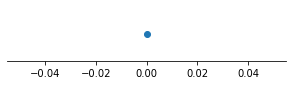

In [8]:
plot_1dim(a,r,n)

Зададим последовательность чисел nб которая определит несклько точек $r`$:

In [42]:
n = np.arange(-5, 15, 1)

Набор чисел n: [-5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


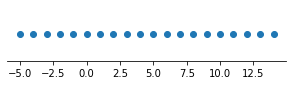

In [43]:
print(f'Набор чисел n: {n}')
plot_1dim(a,r,n)

Пусть любое число $n_i$ из набора чисел $n$ описывается выражением $n_i=n_{i-1}+1$, для всех $n\in{Z}$ (по определению),

тогда, если бы указанное выражение, описывало кристаллическую структуру, то получено описание бесконечной периодической структуры:

Вектор трансляции: `a = [1]`, с координатами едиственно описанного вида атомов, в базисе {a}: `r=[0]`


## Двумерный случай

В двумерном случае базис векторов трансляции определеяющий структуру $ T = n_1\vec{a} + n_2\vec{b} + n_3\vec{c} $ определен двумя числами $n$ и двумя векторами $\vec{a}$ и $\vec{b}$.

Базис приобретает вид:

$T = n_1*\vec{a} + n_2*\vec{b}$

Тогда любая произвольная точка рассматриваемого одномерного пространства будет определена координатой $r'$, с учётом базиса векторов трансляции $T$ для рассматривамого **двумерного** случая:

$ r' = r + n_1*\vec{a} + n_2*\vec{b} $ 
- где $n_i$ - любое произвольное число

Зададим структуру множествами чисел `n_1` и `n_2` в базисе векторов трансляции `a = np.array([1,0])` и `b = np.array([0,1])`

и зададим единственный вид условных атомов точкой `r = 0`

In [11]:
# Translation vectors a,b
a = np.array([1,0])
b = np.array([0,1])

# Coordinate of defined point (2 dimentional)
r = np.array([0,0])

# translations sets
n_1 = np.arange(-4, 4, 1)
n_2 = np.arange(-4, 4, 1)

Определим функцию для построения двумерной структуры:

In [12]:
def get_xy(a, b, r, n_1, n_2):
    xes, ycs = [], []
    for n in product(n_1, n_2, repeat=1):
        # Periodic Boundary Conditions (PBC)
        r_prime = r + n[0]*a + n[1]*b
        xes.append(r_prime[0])
        ycs.append(r_prime[1])
    return xes, ycs   

Построрим полученный набор точек:

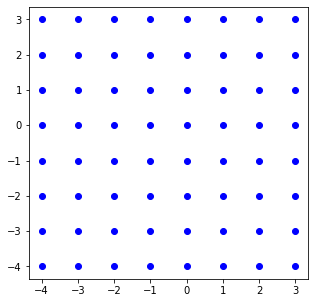

In [13]:
xes, ycs = get_xy(a, b, r, n_1, n_2)
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(xes, ycs, 'bo')
plt.show()

## Описание центрированной структуры

Более сложная центрированная структура всё ещё с одним типом атомов:

In [14]:
a = np.array([1,0])
b = np.array([0,1])

r_1 = [0.0,0.0] # corner site atom
r_2 = [0.5,0.5] # centered atom

# translations sets
n_1 = np.arange(0, 4, 1)
n_2 = np.arange(0, 4, 1)

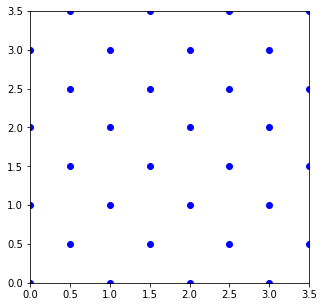

In [15]:
xes_1, ycs_1 = get_xy(a, b, r_1, n_1, n_2)
xes_2, ycs_2 = get_xy(a, b, r_2, n_1, n_2)

fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(xes_1, ycs_1, 'bo')
plt.plot(xes_2, ycs_2, 'bo')
plt.xlim(0,3.5) ; plt.ylim(0,3.5)
plt.show()

### Двойственность описания структур

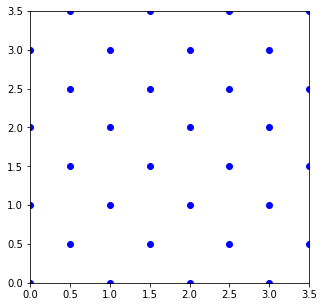

In [16]:
# Translation vectors a,b
a = np.array([0.5,0.5])
b = np.array([0,1])

# Coordinate of defined point (2 dimentional)
r = np.array([0,0])

# translations sets
n_1 = np.arange(0, 8, 1)
n_2 = np.arange(-4, 4, 1)

xes, ycs = get_xy(a, b, r, n_1, n_2)
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(xes, ycs, 'bo')
plt.xlim(0,3.5) ; plt.ylim(0,3.5)
plt.show()

## Несколько сортов атомов

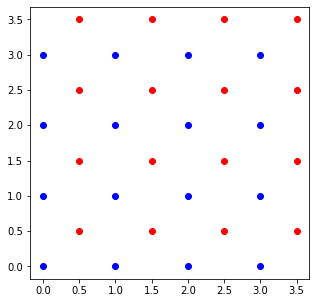

In [17]:
a = np.array([1,0])
b = np.array([0,1])

r_1 = [0.0,0.0] # corner site atom
r_2 = [0.5,0.5] # centered atom

# translations sets
n_1 = np.arange(0, 4, 1)
n_2 = np.arange(0, 4, 1)

xes_1, ycs_1 = get_xy(a, b, r_1, n_1, n_2)
xes_2, ycs_2 = get_xy(a, b, r_2, n_1, n_2)

fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(xes_1, ycs_1, 'bo')
plt.plot(xes_2, ycs_2, 'ro')
plt.show()

---

## Трехмерный случай, с использованием формата записи, аналогичного `POSCAR`:

В формате POSCAR (VASP) вводится так называемый 'scale factor' `s`, который позволяет более явно визуально отразить соотношения векторов трансляции.

При этом наборы трансляций в реальности не нужны (объясняется ниже).

In [18]:
# scale factor
s = 1

# translations vectors
a = np.array([1.0, 0.0, 0.0])
b = np.array([0.0, 1.0, 0.0])
c = np.array([0.0, 0.0, 1.0])

# points' coordinates
r_1 =  np.array([0.0, 0.0, 0.0])
r_2 =  np.array([0.5, 0.5, 0.5])

# translations sets
n_1 = n_2 = n_3 = np.arange(-3, 4, 1)

В трёхмерном случае базис векторов трансляции определеяющий структуру $ T = n_1\vec{a} + n_2\vec{b} + n_3\vec{c} $ определен всеми тремя числами $n$ и всеми тремя векторами $\vec{a}$, $\vec{b}$ и $\vec{c}$.

Тогда любая произвольная точка рассматриваемого одномерного пространства будет определена координатой $r'$, с учётом базиса векторов трансляции $T$ для рассматривамого **трёхмерного** случая:

$ r' = r + n_1*\vec{a} + n_2*\vec{b} + n_3*\vec{c} $ 
- где $n_i$ - любое произвольное число

Определим соответствующую функцию для нахождения координат каждого атома в рассматриваемой структуре:

In [19]:
def get_xyz(s, a, b, c, r, ns):
    xes, ycs, zds = [], [], []
    for n_i in combinations_with_replacement(n_1, 3):
        # Periodic Boundary Conditions (PBC)
        r_prime = r + n_i[0]*s*a + n_i[1]*s*b + n_i[2]*s*c
        xes.append(r_prime[0])
        ycs.append(r_prime[1])
        zds.append(r_prime[2])
    return xes, ycs, zds

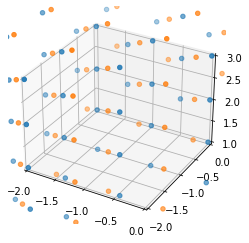

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for r in r_1, r_2:
    xes, ycs, zds = get_xyz(s, a, b, c, r, n_1)
    ax.scatter(xes, ycs, zds)
    plt.xlim(-2,0) ; plt.ylim(-2,0) ; ax.set_zlim(1,3)
plt.show()

## Вычисление энергии двумерной структуры

Зададим исследуюмую двумерную структуру:

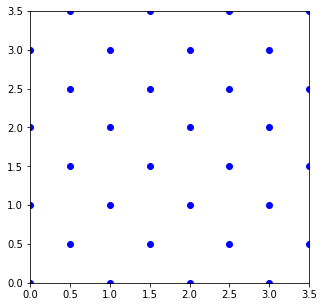

In [21]:
# Translation vectors a,b
a = np.array([0.5,0.5])
b = np.array([0,1])

# Coordinate of defined point (2 dimentional)
r = np.array([0,0])

# translations sets
n_1 = np.arange(0, 8, 1)
n_2 = np.arange(-4, 4, 1)

xes, ycs = get_xy(a, b, r, n_1, n_2)
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(xes, ycs, 'bo')
plt.xlim(0,3.5) ; plt.ylim(0,3.5)
plt.show()

Выражение определяющее Кулоновский парный потенциал для любого числа частиц определяется следующим образом:

$ \hat{U}_{mn} = \frac{1}{2} \sum_{i}\sum_{j\neq{i}} \frac{k Z_i Z_j e^2}{|R_i-R_j|}$

Определим наборы координат всех точек системы: 

In [22]:
# get points list from structure
points = []
for p in zip(xes,ycs):
    points.append(p)

Каждый отдельный парный потенциал в системе выглядит следующим образом:

$ \frac{k Z_i Z_j e^2}{|R_i-R_j|} $

где:
- $k$ - [постоянная Кулона	](https://ru.wikipedia.org/wiki/Закон_Кулона) $k={\frac{1}{4\pi \varepsilon _{0}}}≈8,987 55⋅10^9$  $Ф^{−1}·м $ $(кг·м^3·с^{−4}·А^{−2})$
- $e$ - [элементарный заряд или заряд электрона](https://ru.wikipedia.org/wiki/Элементарный_электрический_заряд)
- $Z_i$ - заряд первого атома рассматриваемой пары
- $Z_j$ - заряд второго атома рассматриваемой пары
- $R_i$ - радиус вектор, определяющий положение первого атома в системе
- $R_j$ - радиус вектор, определяющий положение второго атома в системе

**Вопрос 1:** Как Вы думаете, что определяет выражение $|R_i-R_j|$?

**Вопрос 2:** Как Вы думаете, к какому виду взаимодействий в реалистичной системе относится данный потенциал?

**Вопрос 3:** В расчёте мы явно не рассматриваем электроны, почему в выражении присутствует заряд электрона?

Запишем функцию для расчёта парного потенциала:

In [23]:
def get_Coulomb_for_equal_atoms(Z, points):
    # Coulomb constant
    k = 8.98755E9
    e = 1.602176634E-19

    # iterate over pairs
    sum = 0
    for pair in combinations(points, 2):
        pair = np.array(pair)
        dividend = k*Z*Z*e*e
        divider = abs(np.linalg.norm(pair[0]-pair[1]))
        quotient = dividend/divider
        sum += quotient
    U = sum*0.5
    return U

Предположим, что все точки заряжены и имеют заряд +1:

In [24]:
# Charges
Z = 1
get_Coulomb_for_equal_atoms(Z, points)

9.829243715407992e-26

До сих пор мы никак не использовали периодичность структуры.

Зададим $n_i$ равными, тогда структуры будут определены последовательностями трансляций на равные количества смещений во все стороны.

Т.е. набор последовательно меняющихся трёх равных смещений создаст круг (эллипс) с наибольшим радиус-вектором $max(n*\hat{T}$ ).

Назовём его радиусом отсечки рассмотрения структуры и получим аналог для физически видимого горизонта.

In [25]:
# some cut-off distance
cut_off = 7

# translations sets
n_1 = n_2 = np.arange(0-cut_off, cut_off+1, 1)

In [26]:
# Translation vectors a,b
a = np.array([0.5,0.5])
b = np.array([0,1])

# Coordinates of defined point (2 dimentional)
r = np.array([0,0])

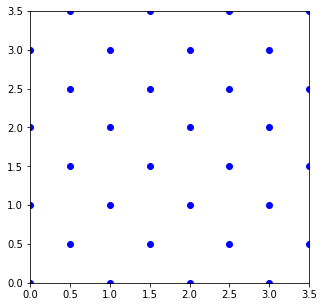

In [27]:
xes, ycs = get_xy(a, b, r, n_1, n_2)
points = []
for p in zip(xes,ycs):
    points.append(p)
    
xes, ycs = get_xy(a, b, r, n_1, n_2)
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(xes, ycs, 'bo')
plt.xlim(0,3.5) ; plt.ylim(0,3.5)
plt.show()

Вычислим энергию структуры:

In [28]:
Z = 1
get_Coulomb_for_equal_atoms(Z, points)

7.04286086939421e-25

Соберем более удобную функцию:

In [29]:
def get_Coulomb_for_equal_atoms(structure, parameters):
    a = np.array(structure['a'])
    b = np.array(structure['b'])
    r = np.array(structure['r'])
    Z = structure['Z'][0]
    cut_off = parameters['cut_off'][0]
    plot = parameters['plot']
    
    n_1 = n_2 = np.arange(0-cut_off, cut_off+1, 1)
    
    xes, ycs = get_xy(a, b, r, n_1, n_2)
    points = []
    
    for p in zip(xes,ycs):
        points.append(p)
        
    if plot:
        xes, ycs = get_xy(a, b, r, n_1, n_2)
        fig, ax = plt.subplots(figsize=(5, 5))
        plt.plot(xes, ycs, 'bo')
        plt.xlim(0,3.5) ; plt.ylim(0,3.5)
        plt.show()
    
    # Coulomb constant
    k = 8.98755E9
    e = 1.602176634E-19
    dividend = k*Z*Z*e*e
    
    # iterate over pairs
    sum = 0
    c = 1
    for pair in combinations(points, 2):
        pair = np.array(pair)
        divider = abs(np.linalg.norm(pair[0]-pair[1]))
        quotient = dividend/divider
        sum += quotient
        c += 1
    U = sum*0.5/c
    return U, c

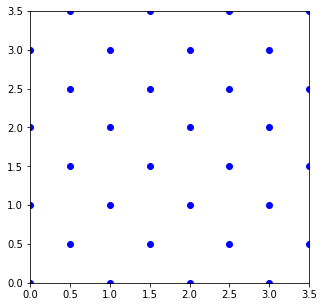

Coulomb potential of defined structure is: 2.490788450898481e-29 V/atom
Iterated over 41617 atoms


In [30]:
structure = {'a':[0.5, 0.5], 
             'b':[0.0, 1.0],
             'Z':[1.0],
             'r':[0.0, 0.0]}

parameters = {'cut_off':[8], 
              'plot':True}

U, c = get_Coulomb_for_equal_atoms(structure, parameters)
print(f'Coulomb potential of defined structure is: {U} V/atom')
print(f"Iterated over {c} atoms")

Найдём оптимальный cut-off:

Cut-off distance: 1
Coulomb potential: 1.0057738573623727e-28 V/atom
Iterated over 37 atoms
---------------------------------
Cut-off distance: 2
Coulomb potential: 7.126369658437786e-29 V/atom
Iterated over 301 atoms
---------------------------------
Cut-off distance: 3
Coulomb potential: 5.450199843618568e-29 V/atom
Iterated over 1177 atoms
---------------------------------
Cut-off distance: 4
Coulomb potential: 4.4059285077514576e-29 V/atom
Iterated over 3241 atoms
---------------------------------
Cut-off distance: 5
Coulomb potential: 3.696140260482121e-29 V/atom
Iterated over 7261 atoms
---------------------------------
Cut-off distance: 6
Coulomb potential: 3.182907728216442e-29 V/atom
Iterated over 14197 atoms
---------------------------------
Cut-off distance: 7
Coulomb potential: 2.794675159475501e-29 V/atom
Iterated over 25201 atoms
---------------------------------
Cut-off distance: 8
Coulomb potential: 2.490788450898481e-29 V/atom
Iterated over 41617 atoms
----------------

Text(0, 0.5, 'Energy, V/atom')

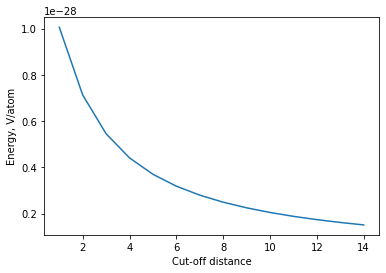

In [31]:
cut_dists = range(1,15,1)
energies = []

structure = {'a':[0.5, 0.5], 
             'b':[0.0, 1.0],
             'Z':[1.0],
             'r':[0.0, 0.0]}

for cut_dist in cut_dists:
    parameters = {'cut_off':[cut_dist], 
                  'plot':False}
    U, c = get_Coulomb_for_equal_atoms(structure, parameters)
    print(f'Cut-off distance: {cut_dist}')
    print(f'Coulomb potential: {U} V/atom')
    print(f"Iterated over {c} atoms")
    energies.append(U)
    print('---------------------------------')
    
plt.plot(cut_dists, energies)
plt.xlabel('Cut-off distance')
plt.ylabel('Energy, V/atom')

**Вопрос 1:** Почему посдледовательность потенциалов получилась сходящейся?

**Вопрос 2:** Как это можно использовать, чтобы уйти от частного случая рассмотрения ограниченного участка периодической структуры?

## Немного истории

- Выражение потенциала, которое мы использовали было открыто в 1785 году.
- Метод, позволяющий вычислять парный потенциал Кулоновского взаимодействия был разработан в 1922 году Питером Эвальдом
А операция быстрого суммирования отдельных парных потенциалов получила название [Суммрование по Эвальду (Ewald Summation)](https://en.wikipedia.org/wiki/Ewald_summation)
- В то время, как комьютерная имплементация этой операции, позволяющая практически мгновенно получать Кулоновский потенциал для очень больших периодических систем без итерирования создана в 1996 году и описана в [статье Toukmaji A.Y., Board, John A. Ewald summation techniques in perspective: a survey Comput. Phys. Commun. 1996. Vol. 95, № 2. P. 73–92.](https://doi.org/10.1016/0010-4655(96)00016-1)
- В библиотеках для Python есть готовые имплементации для сотен разных потенциалов, как парных, так и многочастичных, в т.ч. суммирование Эвальда

## Бонусное задание (+10/+20 б.):
Найти ошибку в имплементации.

**Для того чтобы выполнить бонусное задание и получить баллы необходимо:**

1) ознакомится с материалом по ссылкам с описанием метода ([Wikipedia](https://en.wikipedia.org/wiki/Coulomb_barrier))

2) скопировать части блокнота относящиеся к рассматриваемому вопросу в отдельный блокнот

3) привести пояснения к исправлениям

4) сделать вывод о том, как это влияет на результаты построения сходимости (как меняется функция $\hat{U}_{mn} = f(R_{cutoff}))$

5) дать физическую интерпретацию изменений (пример был на занятии)

6) прислать файл любым способом или загрузить в специальный раздел в заданиях в  canvas, когда он станет доступен

*Например, в качестве значительных улучшений может быть рассмотрено расширение метода на трехмерный случай.*

## Оценивание
В результате Вы гарантированно получите 10 баллов, в случае если выводы верны, а также получите доп. баллы, если изменения значительно улучшили имплементацию. Максимальный балл равен 20, то есть эта работа может полностью заменить практическую работу.

**Баллы не начисляются за аналогичные решения. В этом случае будет зачтена более ранняя отправка.**